In [20]:
import xarray as xr
import sys 
sys.path.append('/Users/cfn18/Desktop/Double-Well-SR/Calculating-Transition-Rate/')
from calculating_transition_times import transition_file_list
import os
from tqdm.notebook import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
cp = sns.color_palette("tab10")
cp

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [13]:
# Getting x and y info

xs = []
ys = []

alpha = 0.0
eps = 1.0
transition_files = transition_file_list(alpha, eps, c2h=True, cluster=False)

for file in tqdm(transition_files):
    da = xr.open_dataset(file)
    xs.append(da.x.values)
    ys.append(da.y.values)
    da.close()


  0%|          | 0/29416 [00:00<?, ?it/s]

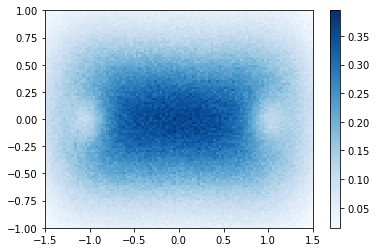

In [46]:
h = plt.hist2d(np.hstack(xs), np.hstack(ys), range= [[-1.5, 1.5], [-1, 1]], bins=100, density=True, cmap=mpl.cm.Blues, cmin=0.01)
plt.colorbar()

In [ ]:
# Function for Streamfield background

def streamfield_background(alpha, ax): 
    # Plot Misc
    ax.set_xlim((-1.5, 1.5))
    ax.set_ylim((-1, 1))
    ax.set_xlabel('x')
    ax.set_ylabel('y')


    # alpha label
    ax.text(-1.2, 0.8, fr'$\alpha = {alpha:.2f}$', fontsize=15, bbox={'facecolor': '1', 'pad': 10}) #

    # Gradient Arrows
    x = np.linspace(-1.5, 1.5, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    vx = X*(X**2 - 1) - 2 * alpha * Y 
    vy = alpha *X*(X**2 - 1) + 2 * Y 
    speed = np.sqrt(vx**2 + vy**2)
    ax.streamplot(x, y, -vx, -vy, color='0')
    # ax.pcolormesh(X, Y, speed, cmap = 'Blues') 

    # Fixed Points
    cold_point = plt.Circle((-1, 0), 0.1, color='b', alpha=0.5)
    mid_point = plt.Circle((0, 0), 0.1, color='g', alpha=0.5)
    hot_point = plt.Circle((1, 0), 0.1, color='r', alpha=0.5)
    ax.add_patch(cold_point)
#     ax.add_patch(mid_point)
    ax.add_patch(hot_point)
    return ax


aspect = 4/3
size = 12
fig, axes = plt.subplots(2, 1, figsize = (size, aspect * size))


# Plotting Histogram of Integration results

for i, ax in zip(integration_results, axes.flatten()):
    
    # Get x and y values
    xs = []
    ys = []
    for t in i:
        xs.append(t.x.values)
        ys.append(t.y.values)
    
    sample_size = max([len(i) for i in integration_results])
    h = ax.hist2d(np.hstack(xs), np.hstack(ys), range= [[-1.5, 1.5], [-1, 1]], bins=100, cmap=mpl.cm.Blues, cmin=1, vmin=0, vmax=sample_size)
    cbar = fig.colorbar(h[3], ax=ax)
    cbar.ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {len(xs)} Cold to Hot Transitions')


# Plotting Minmisers

for m, ax in zip(mam_results, axes.flatten()):
    alpha = m['alpha']
    instanton = m['instanton']
    ax.plot(instanton[:, 0], instanton[:, 1], color=cp[3], lw=3, label='Minimiser')

# Plotting Het Orbits + Streamfield Background

for h, ax in zip(het_orbits, axes.flatten()):
    ax.plot(h.x, h.y, '--', color=cp[3], lw=3, label='Heteroclinic Orbit')
    ax.legend()
    
    # Streamfield Background
    streamfield_background(h.alpha, ax)

# fig.savefig('Cold-to-Hot-Histogram.pdf')
fig.show()

